In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
cols= ['dataset','text', 'logical_fallacies', 'source']
df = pd.DataFrame(columns= cols)

In [38]:
df_1 = pd.read_csv('../data/cleaned/1_logicClimate.csv')
df_2 = pd.read_csv('../data/cleaned/2_Huggingface_dataset.csv', index_col=0)
df_3 = pd.read_csv('../data/cleaned/3_CoCoLoFa_merged.csv')
df_4 = pd.read_csv('../data/cleaned/4_falcon_df_multilabel_annotations.csv')
df_5_1 = pd.read_csv('../data/cleaned/5_climate.csv')
df_5_2 = pd.read_csv('../data/cleaned/5_covid.csv')
# df_6 = pd.read_csv('../data/cleaned/1_logicClimate.csv')
# df_7 = pd.read_csv('../data/cleaned/7_Reddit_dataset.csv', index_col=0) #identical to 4
df_8 = pd.read_csv('../data/cleaned/8_argotario.csv')
df_9 = pd.read_csv('../data/cleaned/9_Goffredo_used_in_MAFALDA_cleaned.csv')

In [39]:

df_1['dataset']=1
df_1 = df_1.rename(columns={ 'original_url': 'source', 'source_article': 'text'})
df_1 = df_1.loc[:,cols ]
df_1.head()

,dataset,text,logical_fallacies,source
0,1,"In June last year , a severe heatwave claimed ...",intentional,https://www.theguardian.com/environment/2016/a...
1,1,Diminishing sea ice is causing major walrus he...,intentional,https://www.theguardian.com/environment/2016/a...
2,1,A landmark report from the United Nations ’ sc...,fallacy of credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
3,1,"The report “ is quite a shock , and quite conc...",fallacy of credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
4,1,The World Coal Association disputed the conclu...,false dilemma,https://www.nytimes.com/2018/10/07/climate/ipc...


In [40]:

df_2['dataset']=2
df_2 = df_2.rename(columns={ 'statement': 'text', 'label': 'logical_fallacies'})
df_2 = df_2.loc[:,['dataset', 'text', 'logical_fallacies']]
df_2.head()

,dataset,text,logical_fallacies
0,2,"The book is popular because it's good, and it'...",circular reasoning
1,2,"This policy is effective because it's popular,...",circular reasoning
2,2,I know that our TV advertisements are more eff...,faulty generalization
3,2,"President Trump , who in the past has called g...",intentional
4,2,A commercial shows a group of friends all hang...,ad populum


In [41]:
df_3 = df_3[['fallacy', 'comment']]
df_3 = df_3.rename(columns={'fallacy':'logical_fallacies', 'comment': 'text' })
df_3['dataset'] = 3
df_3 = df_3.loc[:,['dataset','text', 'logical_fallacies']]
df_3.head()

,dataset,text,logical_fallacies
0,3,Lack of transparency in government isn't unexp...,none
1,3,While the issues discussed here should be addr...,appeal to authority
2,3,The excuse that Brazilian municipalities do no...,none
3,3,This is what's to be expected of developing an...,none
4,3,"Sad to say, I have to agree with you. Rulers c...",appeal to tradition


In [42]:

df_4 = df_4[['fallacy','main_tweet']]
df_4 = df_4.rename(columns={'fallacy':'logical_fallacies','main_tweet': 'text' })
df_4.head()


,logical_fallacies,text
0,['None of the above'],[main_tweet] [user104337]: @user @user ... @us...
1,['None of the above'],[main_tweet] [user79987]: @user @user ... @use...
2,['None of the above'],[main_tweet] [user104337]: @user @user ... @us...
3,"['Loaded Language', 'Ad Hominem']",[main_tweet] [user79987]: @user @user ... @use...
4,['None of the above'],[main_tweet] [user47446]: @user @user ... @use...


In [43]:
i = 0

df_splitted_fallacies = pd.DataFrame(columns=['logical_fallacies', 'text'])
rows_to_delete=[]

for i in range(len(df_4)):
    # print(i)
    current_fallacies = df_4.iloc[i, 0]
    # print('current_fallacies:', current_fallacies)
    current_fallacies = current_fallacies.replace("'", "").replace('[', '').replace(']','')
    splitted_fallacies = current_fallacies.split(sep=',')
    if len(splitted_fallacies)==1:
        df_4.iloc[i, 0] = current_fallacies
    if len(splitted_fallacies)>1:
        for index, f in enumerate(splitted_fallacies):
            new_row = {'logical_fallacies':f, 'text': df_4.iloc[i, 1]}
            df_splitted_fallacies = pd.concat([df_splitted_fallacies, pd.DataFrame([new_row])])
            rows_to_delete.append(i)

    
    

In [44]:
 #remove duplicates
rows_to_delete = list(set(rows_to_delete))

#drop rows with multilabels
df_4 = df_4.drop(axis=0, index=rows_to_delete)

In [45]:
# concate new rows to dataframe
df_4 = pd.concat([df_4, df_splitted_fallacies])
df_4.head()

,logical_fallacies,text
0,None of the above,[main_tweet] [user104337]: @user @user ... @us...
1,None of the above,[main_tweet] [user79987]: @user @user ... @use...
2,None of the above,[main_tweet] [user104337]: @user @user ... @us...
4,None of the above,[main_tweet] [user47446]: @user @user ... @use...
5,Loaded Language,[main_tweet] [user1779]: @user @user ... @user...


In [46]:
df_4['dataset']=4
df_4 = df_4.loc[:,['dataset', 'text', 'logical_fallacies']]

In [47]:
df_5_1.head()

,fact_checked_segment,comment_by_fact-checker,article,logical_fallacies
0,“climate economists see a positive externality...,This is cherry-picking at its worst. You can a...,article36.txt,Cherry Picking
1,The latest U.N. science compendium asserts tha...,The recent US National Climate Assessment1 fin...,article130.txt,Cherry Picking
2,"“‘If we are right, our study challenges decade...",It only potentially challenges ONE method used...,NaN,Cherry Picking
3,“a killer analysis conducted by Craig Idso of ...,"This publication is not peer-reviewed, cherry-...",article45.txt,Cherry Picking
4,"“Next year or the year after that, I think it ...",I would also add that predictions of an ice-fr...,article33.txt,Cherry Picking


In [48]:
df_5_1 = df_5_1[['fact_checked_segment', 'logical_fallacies', 'article']]
df_5_1 = df_5_1.rename(columns={'fact_checked_segment': 'text', 'article': 'source'})
df_5_1['dataset'] = 5
df_5_1 = df_5_1.loc[:,['dataset', 'text', 'logical_fallacies', 'source']]
df_5_1.head()

,dataset,text,logical_fallacies,source
0,5,“climate economists see a positive externality...,Cherry Picking,article36.txt
1,5,The latest U.N. science compendium asserts tha...,Cherry Picking,article130.txt
2,5,"“‘If we are right, our study challenges decade...",Cherry Picking,NaN
3,5,“a killer analysis conducted by Craig Idso of ...,Cherry Picking,article45.txt
4,5,"“Next year or the year after that, I think it ...",Cherry Picking,article33.txt


In [49]:
df_5_2.head()

df_5_2 = df_5_2[['claim', 'logical_fallacies']]
df_5_2 = df_5_2.rename(columns={'claim': 'text' })
df_5_2['dataset'] = 5
df_5_2 = df_5_2.loc[:,['dataset', 'text', 'logical_fallacies']]
df_5_2.head()


,dataset,text,logical_fallacies
0,5,"In November 2020, Ticketmaster announced that ...",Cherry Picking
1,5,Says that “the way to reach ‘herd immunity’ is...,Cherry Picking
2,5,The public won’t be able to claim compensation...,Cherry Picking
3,5,“vaccinated children appear to be significantl...,Cherry Picking
4,5,The WHO now says a child’s presence in school ...,Cherry Picking


In [50]:
df_8.head()
df_8 = df_8.dropna()
df_8 = df_8.rename(columns={'claim': 'text' })
df_8['dataset'] = 8
df_8 = df_8.loc[:,['dataset', 'text', 'logical_fallacies']]
df_8.head()

,dataset,text,logical_fallacies
0,8,"No, imagine you were a teacher and everybody w...",Appeal to Emotion
1,8,"The moon is so far away, we should focus on ou...",Red Herring
2,8,"The green party in Germany has the opinion, th...",Irrelevant Authority
3,8,"No, not at all. Nowadays kids spend all time p...",Red Herring
4,8,"Yes, whoever drinks and drives has a bad reac...",No Fallacy


In [51]:
df_9 = df_9[['text', 'fallacy']]
df_9 = df_9.rename(columns={'fallacy': 'logical_fallacies' })
df_9['dataset'] = 9
df_9 = df_9.loc[:,['dataset', 'text', 'logical_fallacies']]
df_9.head()

,dataset,text,logical_fallacies
0,9,"And I think you get a certain arrogance, burea...",Ad Hominem
1,9,Bill Clinton simply has trouble telling the tr...,Ad Hominem
2,9,he has a long record of engaging in racist beh...,Ad Hominem
3,9,she's got no business ability,Ad Hominem
4,9,she doesn't have that,Ad Hominem


In [52]:

def adjust(data):
    data['logical_fallacies']=data['logical_fallacies'].map(lambda x: x.lower().replace(' ', '_'))
    return data

df_1 = adjust(df_1)
df_2 = adjust(df_2)
df_3 = adjust(df_3)
df_4 = adjust(df_4)
df_5_1 = adjust(df_5_1)
df_5_2= adjust(df_5_2)
# df_6 = adjust(df_6)
df_8 = adjust(df_8)
df_9 = adjust(df_9)

In [53]:
dfList = [df_1, df_2, df_3, df_4 ,df_5_1, df_5_2, df_8, df_9]
for d in dfList:
    print (d.columns)


Index(['dataset', 'text', 'logical_fallacies', 'source'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies', 'source'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')
Index(['dataset', 'text', 'logical_fallacies'], dtype='object')


In [54]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5_1, df_5_2, df_8, df_9])
df

,dataset,text,logical_fallacies,source
0,1,"In June last year , a severe heatwave claimed ...",intentional,https://www.theguardian.com/environment/2016/a...
1,1,Diminishing sea ice is causing major walrus he...,intentional,https://www.theguardian.com/environment/2016/a...
2,1,A landmark report from the United Nations ’ sc...,fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
3,1,"The report “ is quite a shock , and quite conc...",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
4,1,The World Coal Association disputed the conclu...,false_dilemma,https://www.nytimes.com/2018/10/07/climate/ipc...
...,...,...,...,...
1670,9,separation of church and state,slogans,NaN
1671,9,Our character is on the ballot,slogans,NaN
1672,9,Show up and vote,slogans,NaN
1673,9,I don't believe that Hillary has the stamina.,ad_hominem,NaN


In [55]:
df['logical_fallacies'].unique()

array(['intentional', 'fallacy_of_credibility', 'false_dilemma',
       'appeal_to_emotion', 'equivocation', 'faulty_generalization',
       'fallacy_of_relevance', 'fallacy_of_logic', 'ad_populum',
       'false_causality', 'ad_hominem', 'fallacy_of_extension',
       'circular_reasoning', 'none', 'appeal_to_authority',
       'appeal_to_tradition', 'appeal_to_worse_problems',
       'hasty_generalization', 'slippery_slope', 'appeal_to_majority',
       'appeal_to_nature', 'none_of_the_above', 'loaded_language',
       'appeal_to_ridicule', 'appeal_to_fear', '_ad_hominem',
       '_hasty_generalization', '_appeal_to_ridicule', '_false_dilemma',
       '_appeal_to_fear', 'cherry_picking', 'evading_the_burden_of_proof',
       'false_analogy', 'false_authority', 'false_cause', 'no_fallacy',
       'post_hoc', 'red_herring', 'strawman', 'vagueness',
       'irrelevant_authority', 'slogans'], dtype=object)

In [ ]:
# labels ={
#     'intentional',
#     'fallacy_of_credibility',
#     'false_dilemma',
#     'appeal_to_emotion',
#     'equivocation',
#     'faulty_generalization',
#     'fallacy_of_relevance',
#     'fallacy_of_logic',
#     'ad_populum',
#     'false_causality',
#     'ad_hominem',
#     'fallacy_of_extension',
#     'circular_reasoning',
#     'none',
#     'appeal_to_authority',
#     'appeal_to_tradition',
#     'appeal_to_worse_problems',
#     'hasty_generalization',
#     'slippery_slope',
#     'appeal_to_majority',
#     'appeal_to_nature',
#     'none_of_the_above',
#     'loaded_language',
#     'appeal_to_ridicule',
#     'appeal_to_fear',
#     '_ad_hominem': 'ad_hominem',
#     '_hasty_generalization',
#     '_appeal_to_ridicule',
#     '_false_dilemma',
#     '_appeal_to_fear',
#     'cherry_picking',
#     'evading_the_burden_of_proof',
#     'false_analogy',
#     'false_authority',
#     'false_cause',
#     'no_fallacy',
#     'post_hoc',
#     'red_herring',
#     'strawman',
#     'vagueness',
#     'irrelevant_authority',
#     'slogans'
# }

In [58]:
labels ={
    'none_of_the_above': 'none',
    '_ad_hominem': 'ad_hominem',
    '_hasty_generalization':'hasty_generalization',
    '_appeal_to_ridicule': 'appeal_to_ridicule',
    '_false_dilemma': 'false_dilemma',
    '_appeal_to_fear':'appeal_to_fear',
    'no_fallacy': 'none'
}

df= df.replace(labels)

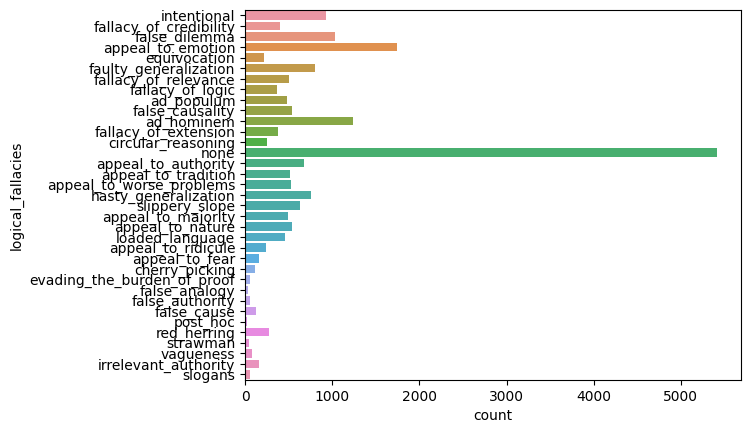

In [66]:
sns.countplot(data = df, y ='logical_fallacies')
plt.show()

In [64]:
df.groupby('logical_fallacies')['logical_fallacies'].value_counts().sort_values(ascending=False)

logical_fallacies
none                           5419
appeal_to_emotion              1741
ad_hominem                     1238
false_dilemma                  1037
intentional                     927
faulty_generalization           802
hasty_generalization            760
appeal_to_authority             677
slippery_slope                  631
appeal_to_nature                538
false_causality                 534
appeal_to_worse_problems        531
appeal_to_tradition             515
fallacy_of_relevance            499
appeal_to_majority              492
ad_populum                      483
loaded_language                 457
fallacy_of_credibility          397
fallacy_of_extension            382
fallacy_of_logic                369
red_herring                     271
circular_reasoning              256
appeal_to_ridicule              238
equivocation                    222
appeal_to_fear                  157
irrelevant_authority            157
false_cause                     129
cherry_pic